# Summarizing metrics from SDT horiz out of plane lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import pandas as pd
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_horiz_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# initialize object to hold data

In [3]:
# get an object that holds summary data for all files
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'HorizSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnorma_adj, sup_dnormd, sup_dnormd_adj, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


# dependent variable correlations

In [10]:
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'horizSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\horizSDTCorrs.csv


# qualitative plots

In [ ]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1w1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

In [ ]:
cvld1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

In [ ]:
qsd1 = mp.qualityScatterSimple(ms, ms.ss, 'int_Ca', 'spacing_adj', cvar0='l1d1', simplify=True, logx=True, plotType='paper', figsize=(4,4))
qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d1_HOP'))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [ ]:
qsw1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', '', y0var='spacing_adj', cvar0='l1w1', simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsw1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w1_HOP'))

In [ ]:
qsd1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1d1', simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d1_HOP'))

In [ ]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1w2', simplify=False, logx=True, plotType='paper', figsize=(4,5))
qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_HOP'))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2'
                            , dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))
cvlw2.axs[0,0].set_ylim([0.4, 2.6])
cvlw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_HOP_spacing'))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2w3'
                            , dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))
cvlw2.axs[0,0].set_ylim([0.4, 2.6])
cvlw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2w3_HOP_spacing'))

In [ ]:
cvld2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1d2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))
cvld2.axs[0,0].set_ylim([0.4, 2.6])
cvld2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d2_HOP_spacing'))

In [ ]:
cvlw3e = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3end', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

cvlw3e.axs[0,1].set_ylim([3*10**-4, 3*10**-1])
cvlw3e.axs[0,1].set_yticks([10**-3, 10**-2, 10**-1])
cvlw3e.axs[0,1].set_xlim([4*10**-3, 2*10**0])
cvlw3e.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3end_HoP_spacing'))

In [ ]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3', simplify=False, dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))
cvlw3.axs[0,0].set_ylim([0.4, 2.6])
cvlw3.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3_HOP_spacing'))

In [ ]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3end', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

cvlw3.axs[1,0].set_ylim([0.4, 2.6])
cvlw3.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3end_HOP_spacing'))

# quantitative plots

In [ ]:
# plot a variable across many steps in the printing process
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='yTop', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [ ]:
# get a list of files that have measurements within a certain range
ms.reduceRows('ldiff_w3o', yvarmax=-0.3);

In [7]:
# open the folder number based on row in the ms.ss dataframe, in windows explorer
ms.openFolder(536)

# export plots

In [ ]:
# plot shrinkage for single/double lines
yvl = mp.shrinkagePlot(ms, r'SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.500', export=True)
yvl.fig

In [ ]:
# plot shrinkage for double/triple lines
yvl = mp.shrinkage3Plot(ms, 'HOP', export=True)
yvl.fig

In [ ]:
# plot vertical shifts for single/double lines
yvl = mp.shiftPlot(ms, 'HOP', export=True)
yvl.fig

In [ ]:
# plot fusion for single/double lines
mp.fusionPlot(ms, 'HOP', export=True).fig

In [ ]:
# plot fusion for double/triples lines
mp.fusion3Plot(ms, 'HOP', export=True).fig

In [ ]:
# plot gap size for disturbed lines
mp.gapPlot(ms, 'HOP', yvar='space_b_d1p', export=True, markerList=['v'], color='#808080')

# export regressions

In [ ]:
# export regression tables and relevant plots
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='tabularShort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='HOP'
                          , exportFolder=os.path.join(cfg.path.fig, 'SDT'), **kwargs)

In [ ]:
# shrinkage
exportRegression('dwndt_w1o')
exportRegression('delta_wn_disturb1')
exportRegression('dwndt_d1o')
exportRegression('delta_wn_write2')
exportRegression('dwndt_w2o')
exportRegression('delta_wn_disturb2')
exportRegression('dwndt_d2o')
exportRegression('delta_wn_write3')
exportRegression('dwndt_w3o')
exportRegression('ldiff_w2o')
exportRegression('ldiff_w3o')

In [ ]:
exportRegression('yBot_w2o')
exportRegression('yTop_w2o')

In [ ]:
# shifting
exportRegression('yBot_w1o')
exportRegression('yTop_w1o')

exportRegression('delta_yBot_disturb1')
exportRegression('delta_yBot_write2')
exportRegression('delta_yBot_disturb2')
exportRegression('delta_yBot_disturb2', Camax=1)
exportRegression('delta_yBot_write3')
exportRegression('delta_yBot_write3', Camax=1)


exportRegression('delta_yTop_disturb1')
exportRegression('delta_yTop_disturb2')
exportRegression('delta_yTop_disturb2', Camax=1)

In [ ]:
# shifting
exportRegression('roughness_w2o')
exportRegression('roughness_w2o', spacing=0.875)

exportRegression('emptiness_w2o')
exportRegression('emptiness_w2o', spacing=0.875)

exportRegression('segments_w2o')

In [ ]:
# fusion 2
exportRegression('delta_roughness_write2')
exportRegression('delta_roughness_write2', spacing=1.25)
exportRegression('delta_roughness_disturb2')
exportRegression('delta_roughness_disturb2', spacing=1.25)
exportRegression('delta_roughness_write3')
exportRegression('delta_roughness_write3', spacing=1.25)

In [ ]:
# shifting
exportRegression('space_b_d1p')

## wn

,const,ink,sup,Prod,Ratio
Ca,0.56,0.42,0.56,0.49,NaN
$\overline{d_{PR.asc}}$,NaN,0.42,0.56,0.5,-0.21
$\overline{d_{PR.desc}}$,NaN,0.38,$\bm{0.61}$,0.53,-0.13
"$\overline{d_{PR.asc,adj}}$",NaN,0.46,0.49,0.5,-0.21
"$\overline{d_{PR.desc,adj}}$",NaN,0.39,$\bm{0.59}$,0.52,-0.13
We,NaN,0.35,0.26,0.31,0.12
Oh,NaN,0.41,$\bm{0.67}$,0.59,NaN
Re,NaN,-0.23,-0.54,-0.51,NaN
$Bm_{asc}$,NaN,-0.2,-0.31,-0.36,NaN
$Bm_{desc}$,NaN,NaN,0.22,NaN,NaN


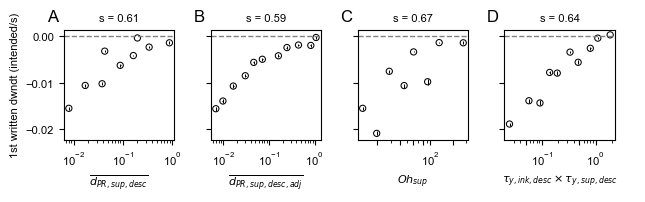

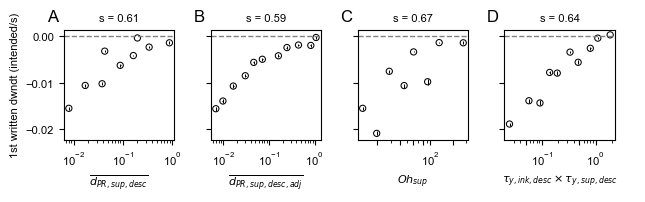

In [95]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w1o', logy=False, printOut=True,  package='pgfshort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d1o', logy=False, printOut=False,  package='pgfshort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.07,2.4e-01
1,adjusted spacing,-0.04,4.8e-01
2,$Gta_{ink}/Gta_{sup}$,0.04,5.6e-01
3,$tGd_{ink}/tGd_{sup}$,-0.06,3.1e-01
4,$Ga_{ink}/Ga_{sup}$,-0.00,9.6e-01
5,$Gd_{ink}/Gd_{sup}$,-0.04,5.3e-01
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.23,1.0e-04
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.10,9.3e-02
8,$\bm{Ca}$,$\bm{0.66}$,$\bm{2.2e-35}$
9,$Ca_{ink}$,0.51,8.8e-20


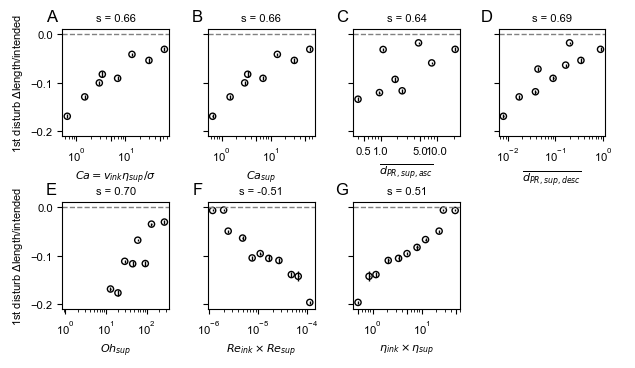

In [58]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb1', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.31,1.7e-13
1,adjusted spacing,-0.18,2.6e-05
2,$Gta_{ink}/Gta_{sup}$,-0.18,3.6e-05
3,$tGd_{ink}/tGd_{sup}$,-0.24,1.6e-08
4,$Ga_{ink}/Ga_{sup}$,-0.16,1.9e-04
5,$Gd_{ink}/Gd_{sup}$,-0.16,2.4e-04
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.01,8.5e-01
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.24,9.7e-09
8,$Ca$,-0.12,3.6e-03
9,$Ca_{ink}$,-0.13,2.6e-03


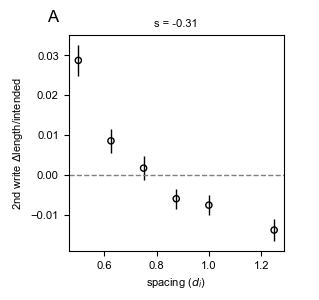

In [57]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write2', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w2o', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb2', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Re_{sup}$,-0.50,8.3e-18
1,$\eta_{sup}$,0.50,8.3e-18


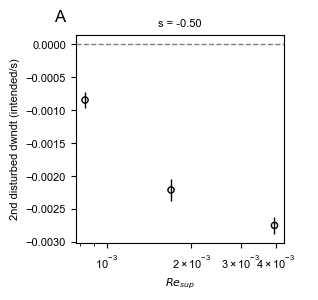

In [127]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,0.46,8.7e-16


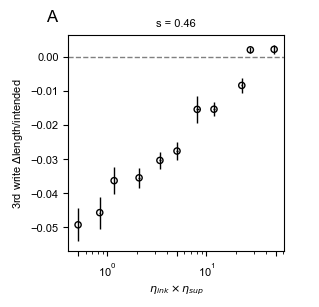

In [123]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.47,5.7e-17


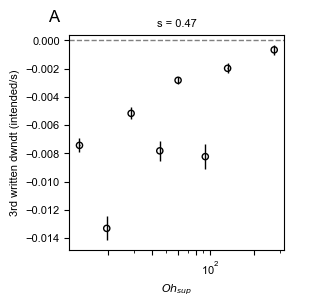

In [124]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.46,3.6e-03


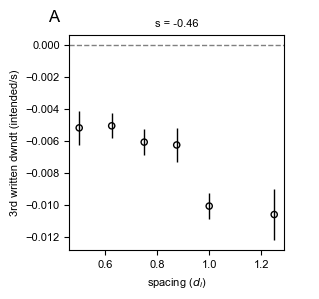

In [125]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'dwndt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## ldiff

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.72,1.1e-86
1,$Ca_{sup}$,-0.72,1.1e-86
2,$Ca_{ink}\times Ca_{sup}$,-0.66,1.5e-70
3,$\overline{d_{PR.sup.asc}}$,-0.68,6.4e-74
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.68,1.4e-74
5,$\overline{d_{PR.sup.desc}}$,-0.70,8.1e-82
6,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.70,1.6e-80
7,$We_{ink}$,-0.56,8.6e-47
8,$We_{sup}$,-0.53,3.8e-41
9,$We_{ink}\times We_{sup}$,-0.54,3.4e-43


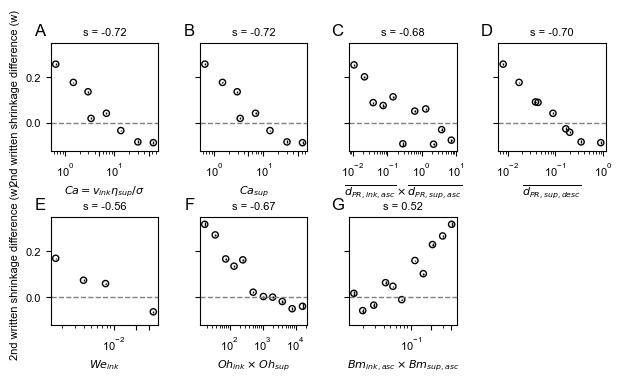

In [132]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.70,5.5e-40
1,$Ca_{sup}$,-0.70,5.5e-40
2,$Ca_{ink}\times Ca_{sup}$,-0.68,3.4e-37
3,$\overline{d_{PR.sup.asc}}$,-0.64,3.3e-31
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.67,6.3e-36
5,$\overline{d_{PR.ink.desc}}$,-0.71,1.2e-41
6,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.73,3.3e-44
7,$We_{ink}$,-0.63,5.7e-31
8,$We_{sup}$,-0.61,3.4e-28
9,$We_{ink}\times We_{sup}$,-0.62,4.1e-29


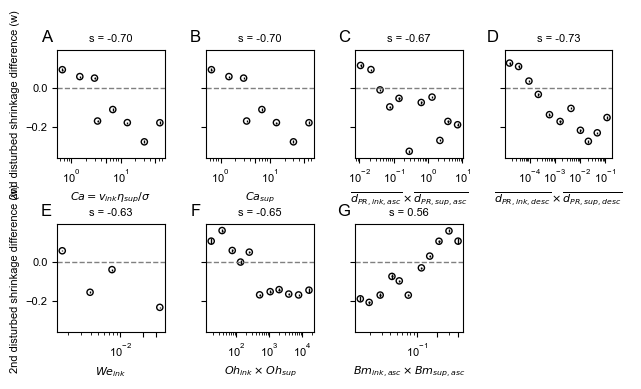

In [133]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.66,4.2e-37
1,$Ca_{sup}$,-0.66,4.2e-37
2,$\overline{d_{PR.sup.asc}}$,-0.60,7.0e-29
3,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.57,3.6e-25
4,$\overline{d_{PR.sup.desc}}$,-0.65,1.1e-35
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.62,6.4e-31
6,$Oh_{sup}$,-0.63,2.7e-32


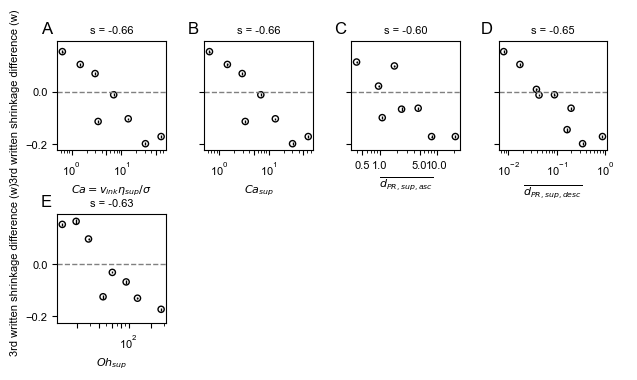

In [134]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## meanT

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.66,3.2e-35
1,$Ca_{sup}$,-0.66,3.2e-35
2,$\overline{d_{PR.sup.asc}}$,-0.67,1.1e-36
3,$\overline{d_{PR.sup.desc}}$,-0.69,6.8e-41
4,$Oh_{sup}$,-0.73,7.4e-48
5,$Re_{sup}$,0.55,7.2e-23
6,$Re_{ink}\times Re_{sup}$,0.54,1.2e-22
7,$\eta_{sup}$,-0.55,7.2e-23
8,$\eta_{ink}\times \eta_{sup}$,-0.54,2.2e-22


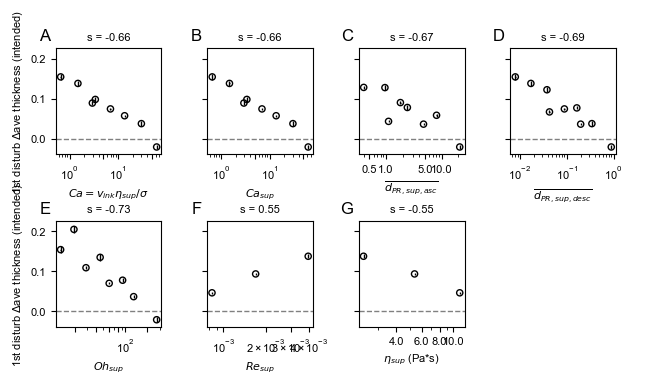

In [136]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.78,7.2e-111


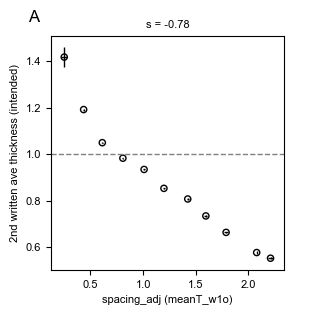

In [137]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'meanT_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,-0.38,1.1e-10


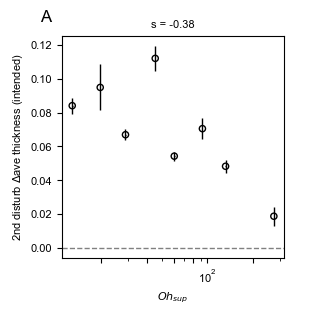

In [155]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.59,1.2e-05
1,$Ca_{sup}$,-0.59,1.2e-05
2,$\overline{d_{PR.sup.asc}}$,-0.55,5.9e-05
3,$\overline{d_{PR.sup.desc}}$,-0.60,8.0e-06
4,$Oh_{sup}$,-0.67,2.4e-07
5,$Re_{sup}$,0.54,8.6e-05
6,$\eta_{sup}$,-0.54,8.6e-05


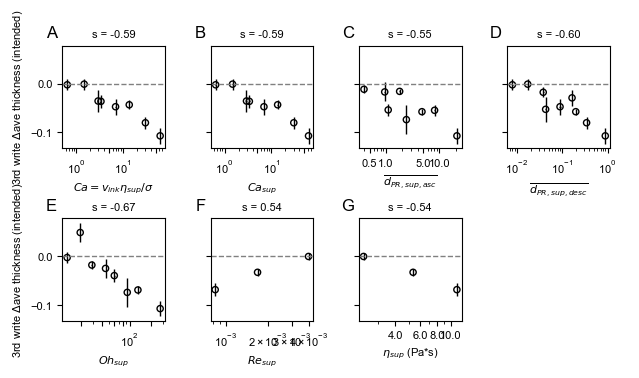

In [157]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_write3', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.62,7.9e-06


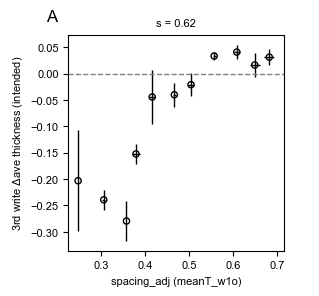

In [161]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.74,1.9e-13


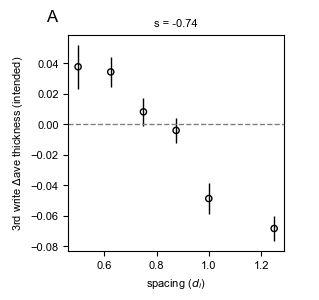

In [165]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>10], 'delta_meanT_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## segments

,variable,Spearman coeff,Spearman p
0,spacing,0.77,2.2e-106


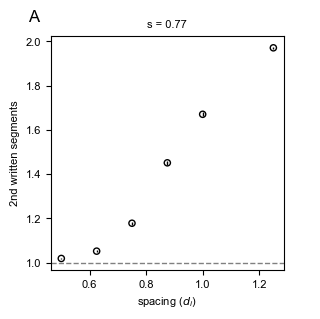

In [90]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [8]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.22,3.7e-02


,variable,Spearman coeff,Spearman p
0,$Ca$,-0.54,1.4e-04
1,$Ca_{sup}$,-0.54,1.4e-04
2,$\overline{d_{PR.sup.asc}}$,-0.56,6.7e-05
3,$\overline{d_{PR.sup.desc}}$,-0.60,1.4e-05
4,$Oh_{sup}$,-0.56,8.6e-05


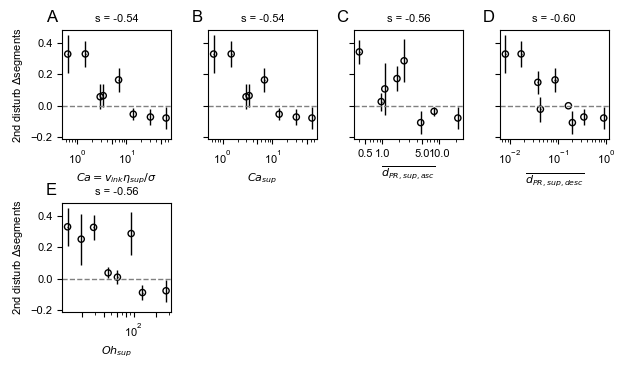

In [101]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'delta_segments_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.46,4.1e-16


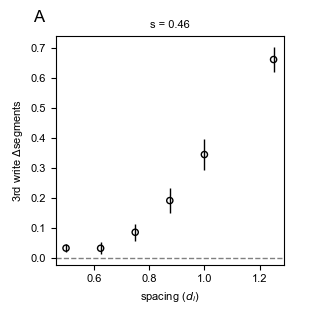

In [107]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_segments_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.77,1.5e-56


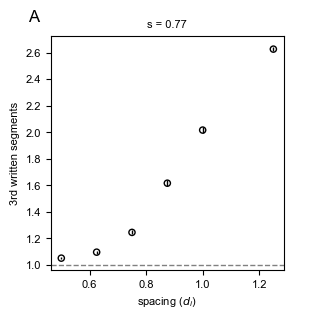

In [108]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## roughness

,variable,Spearman coeff,Spearman p
0,spacing,0.76,1.9e-101


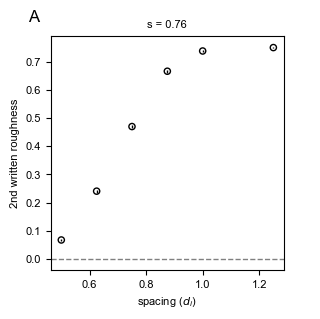

In [167]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [12]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', spacing=0.875, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.61,1.4e-10
1,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.56,5.2e-09
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.61,1.4e-10
3,$\overline{d_{PR.sup.desc}}$,0.54,2.1e-08
4,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,-0.56,5.2e-09
5,$Oh_{sup}$,0.67,3.4e-13
6,$Re_{sup}$,-0.69,3.7e-14
7,$\eta_{sup}$,0.69,3.7e-14


,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.54,2.9e-08
1,$Oh_{ink}\times Oh_{sup}$,0.57,4.5e-09
2,$Re_{ink}\times Re_{sup}$,-0.66,1.9e-12
3,$\eta_{ink}\times \eta_{sup}$,0.65,2.0e-12


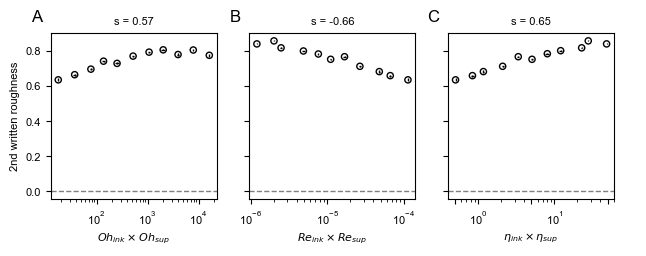

In [168]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.62,9.9e-11
1,$Ca$,0.61,4.2e-10
2,$Ca_{sup}$,0.61,4.2e-10
3,$\overline{d_{PR.sup.asc}}$,0.62,1.3e-10
4,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.62,9.9e-11
5,$\overline{d_{PR.sup.desc}}$,0.67,6.7e-13
6,$Oh_{sup}$,0.67,5.9e-13


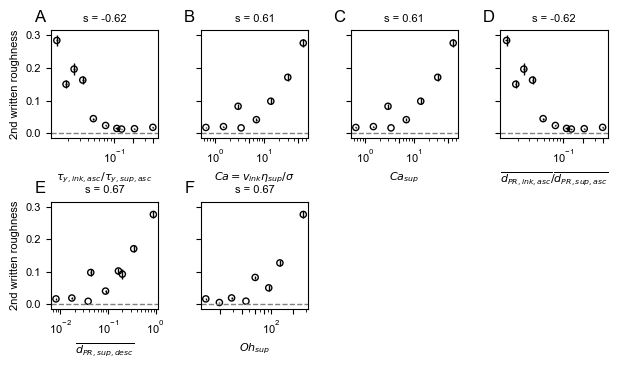

In [169]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.59,7.7e-28


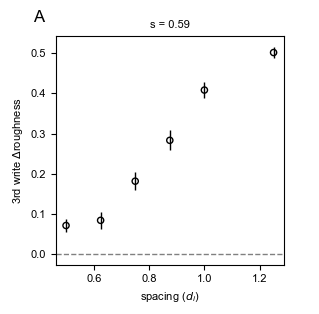

In [170]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [14]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.77,2.67e-105


In [15]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
51,$\tau_{yia}$,0.34,2.31e-08


## emptiness

,variable,Spearman coeff,Spearman p
0,spacing,0.70,2.2e-80
1,spacing_adj,0.63,4.7e-62


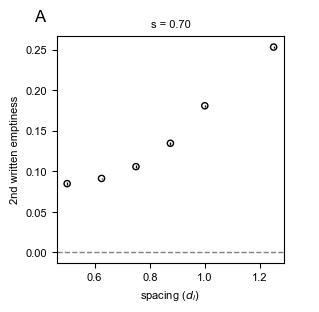

In [172]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [5]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Gta_{ink}/Gta_{sup}$,-0.62,4.0e-11
1,$Ga_{ink}/Ga_{sup}$,-0.64,6.8e-12
2,$Gd_{ink}/Gd_{sup}$,-0.66,8.4e-13
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.62,4.2e-11
4,$Ca_{ink}/Ca_{sup}$,-0.68,1.7e-13
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.62,4.2e-11
6,$Oh_{ink}/Oh_{sup}$,-0.68,1.9e-13
7,$Re_{ink}/Re_{sup}$,0.68,1.8e-13
8,$Bm_{ink.desc}\times Bm_{sup.desc}$,0.54,3.8e-08
9,$\eta_{ink}/\eta_{sup}$,-0.68,1.7e-13


In [13]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=0.875, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Gta_{ink}/Gta_{sup}$,-0.64,1.0e-11
1,$Ga_{ink}/Ga_{sup}$,-0.66,5.2e-13
2,$Gd_{ink}/Gd_{sup}$,-0.69,2.3e-14
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.68,1.3e-13
4,$Ca_{ink}/Ca_{sup}$,-0.68,9.7e-14
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.68,1.3e-13
6,$Oh_{ink}/Oh_{sup}$,-0.68,9.6e-14
7,$Re_{ink}/Re_{sup}$,0.68,1.0e-13
8,$\eta_{ink}/\eta_{sup}$,-0.68,9.7e-14


In [6]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,-0.55,3.0e-08
1,$\eta_{sup}$,0.55,3.0e-08


,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.36,2.5e-09


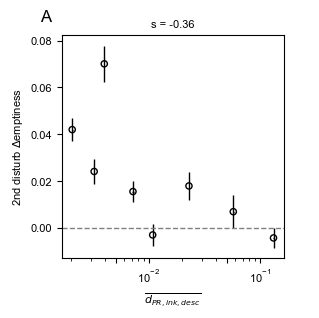

In [175]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.46,7.9e-16


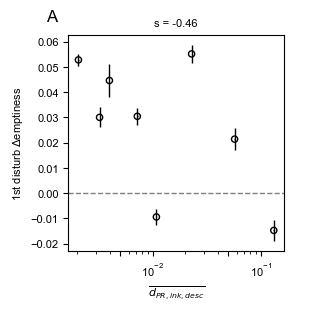

In [176]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Gd_{ink}/Gd_{sup}$,-0.50,4.9e-04


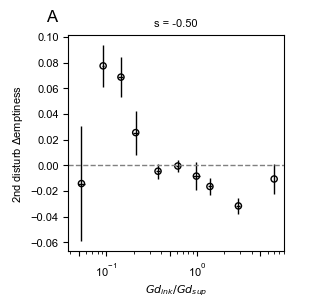

In [274]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Bm_{ink.desc}$,-0.52,3.8e-04
1,$Bm_{ink.desc}\times Bm_{sup.desc}$,-0.51,4.4e-04
2,$Bm_{ink.desc}/Bm_{sup.desc}$,-0.52,3.1e-04


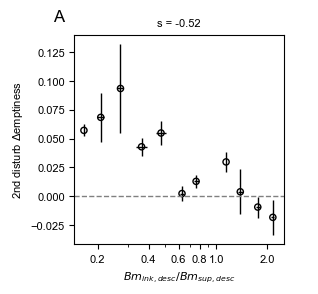

In [275]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yBot

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.48,1.9e-49
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.48,1.9e-49


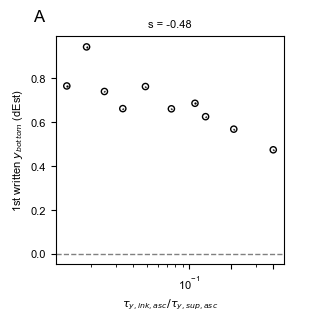

In [184]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'yBot_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.46,7.3e-16
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.46,7.3e-16


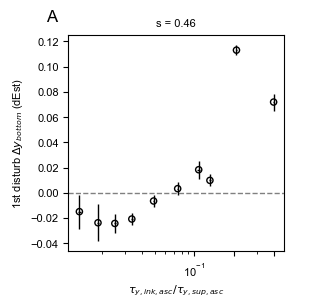

In [185]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.17,4.2e-05


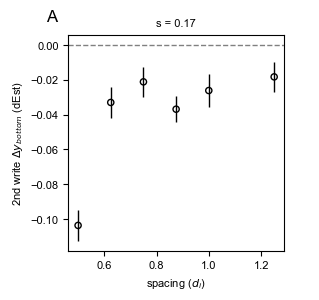

In [201]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [5]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.38,3.3e-10
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.38,3.3e-10


,variable,Spearman coeff,Spearman p
0,spacing,-0.58,5.9e-04


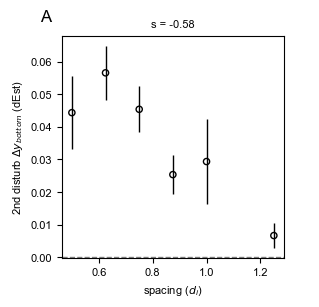

In [210]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yBot_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.58,4.1e-05
1,$Ca_{ink}\times Ca_{sup}$,-0.50,5.2e-04
2,$We_{ink}$,-0.54,1.4e-04
3,$We_{sup}$,-0.51,3.6e-04
4,$We_{ink}\times We_{sup}$,-0.56,9.0e-05


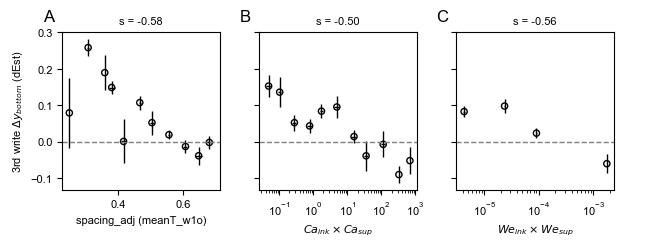

In [213]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [6]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.37,2.0e-10


,variable,Spearman coeff,Spearman p
0,spacing,-0.55,4.0e-04


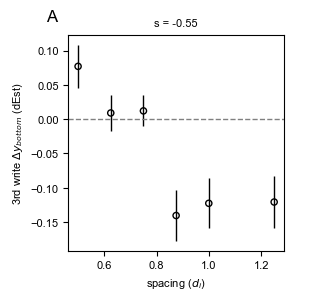

In [216]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yBot_write3',logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yTop

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'yTop_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.50,2.7e-53
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.50,2.7e-53


,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.54,5.2e-22
1,$Ca$,-0.53,4.0e-21
2,$Ca_{sup}$,-0.53,4.0e-21
3,$\overline{d_{PR.sup.asc}}$,-0.53,3.5e-21
4,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.54,5.2e-22
5,$\overline{d_{PR.sup.desc}}$,-0.55,3.6e-23
6,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.51,1.7e-19
7,$Oh_{sup}$,-0.53,3.6e-21


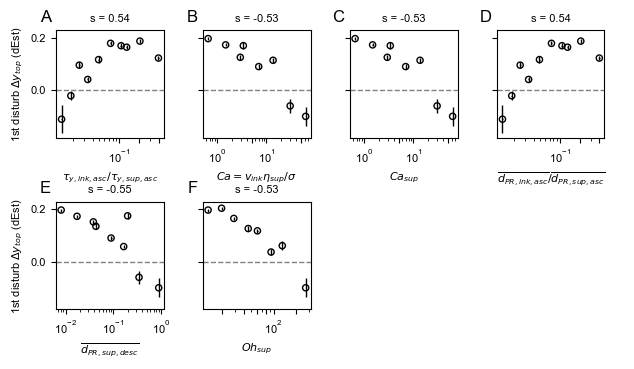

In [186]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.56,1.2e-03
1,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.51,3.2e-03


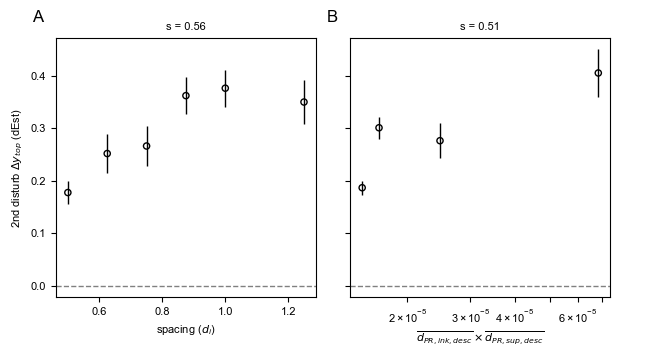

In [209]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yTop_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [11]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.32,1.2e-07


,variable,Spearman coeff,Spearman p
3,$Bm_{ink.asc}/Bm_{sup.asc}$,0.47,7.1e-17


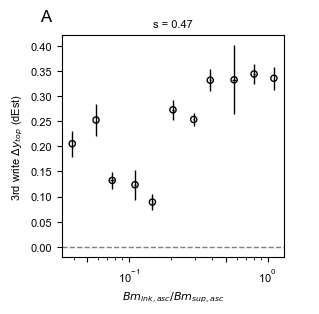

In [211]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yc

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.65,7.9e-35
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.65,7.9e-35
2,$\overline{d_{PR.sup.desc}}$,-0.53,1.3e-21
3,$Oh_{sup}$,-0.55,3.6e-23


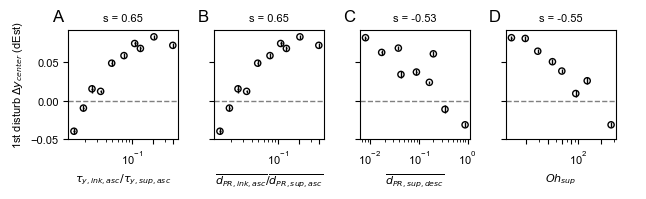

In [189]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.59,6.8e-04
1,$Ca$,0.58,8.2e-04
2,$Ca_{sup}$,0.58,8.2e-04
3,$\overline{d_{PR.sup.asc}}$,0.58,8.2e-04
4,$\overline{d_{PR.sup.desc}}$,0.58,8.2e-04
5,$We_{sup}$,0.58,8.2e-04
6,$Oh_{sup}$,0.58,8.2e-04


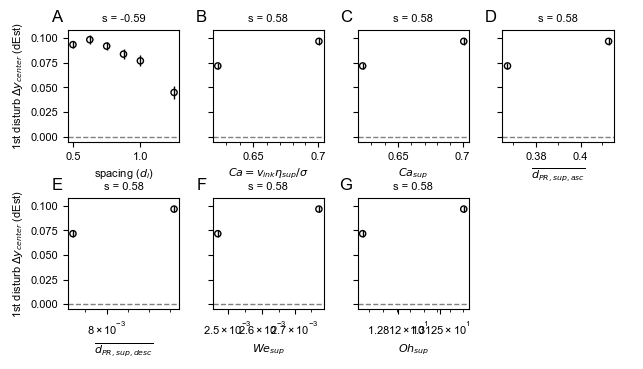

In [190]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yc_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.60,5.8e-08


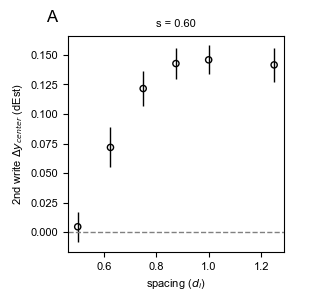

In [191]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yc_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,-0.57,9.2e-09
1,$\eta_{sup}$,0.57,9.2e-09


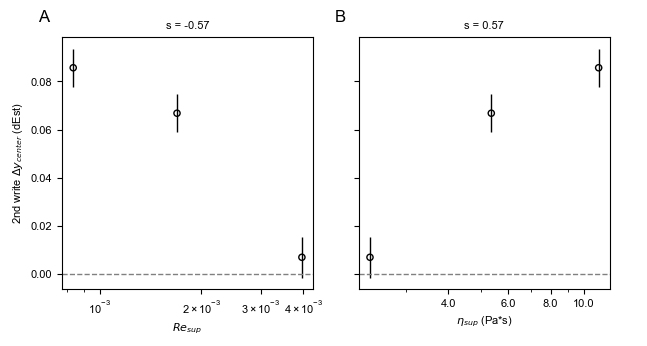

In [193]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Ca_{ink}$,-0.48,1.4e-06


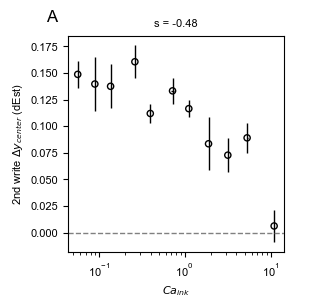

In [194]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.55,3.1e-22
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.55,3.1e-22


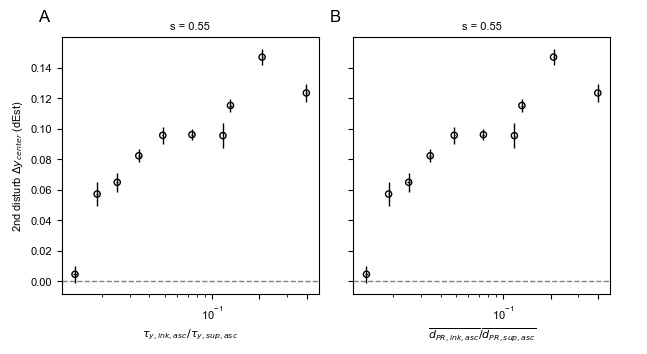

In [204]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.47,3.7e-17


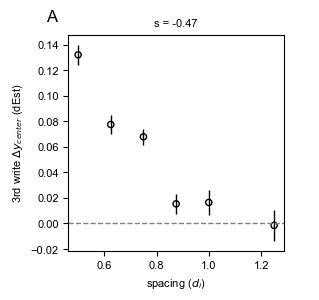

In [221]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write3',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.61,1.0e-05
1,$Ca_{ink}$,-0.60,1.5e-05
2,$Ca_{ink}\times Ca_{sup}$,-0.57,5.4e-05
3,$\overline{d_{PR.ink.asc}}$,-0.58,3.1e-05
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.56,9.1e-05
5,$We_{ink}$,-0.60,2.0e-05
6,$We_{sup}$,-0.60,2.0e-05
7,$We_{ink}\times We_{sup}$,-0.62,6.8e-06
8,$Oh_{ink}$,-0.55,1.2e-04
9,$Oh_{ink}\times Oh_{sup}$,-0.54,1.4e-04


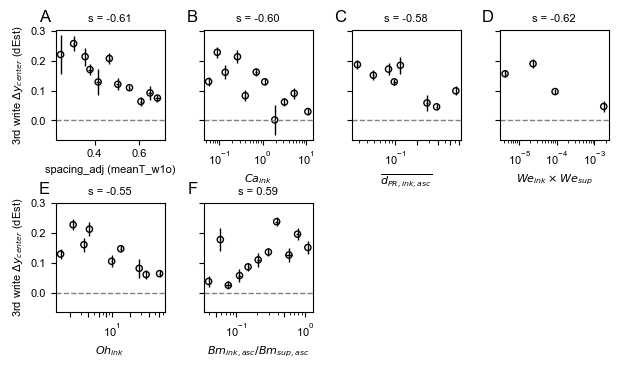

In [224]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## space_b

,variable,Spearman coeff,Spearman p
0,spacing,0.91,4.3e-107
1,spacing_adj,0.84,2.5e-73


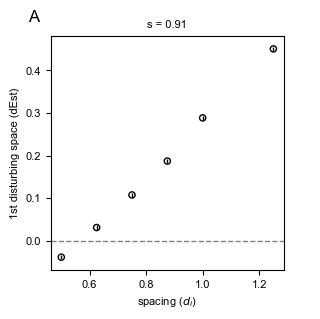

In [230]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [38]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.75], 'space_b_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
13,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,-0.42,3.06e-03
21,"$\overline{d_{PR.ink.desc,adj}}/\overline{d_{P...",-0.42,3.06e-03
53,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.42,3.06e-03


,variable,Spearman coeff,Spearman p
0,spacing,0.77,9.4e-53


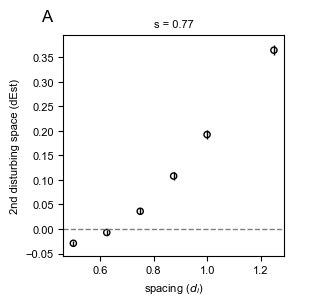

In [265]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.62,5.8e-06


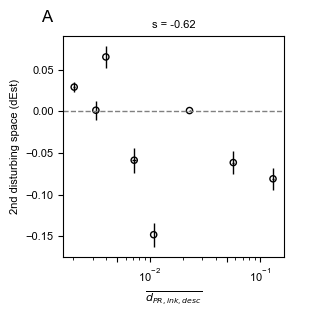

In [266]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## dyflr

,variable,Spearman coeff,Spearman p
0,$tGd_{ink}/tGd_{sup}$,0.54,1.2e-04
1,$Ga_{ink}/Ga_{sup}$,0.52,2.3e-04
2,$Gd_{ink}/Gd_{sup}$,0.54,1.1e-04
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.57,3.3e-05
4,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,0.53,1.3e-04
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.57,3.3e-05
6,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,0.53,1.3e-04
7,$Oh_{sup}$,-0.58,2.0e-05
8,$Re_{sup}$,0.60,1.1e-05
9,$\eta_{sup}$,-0.60,1.1e-05


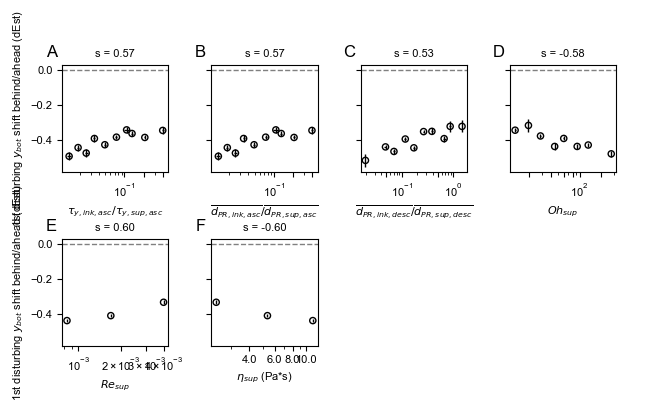

In [246]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dyflr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.80,2.2e-62


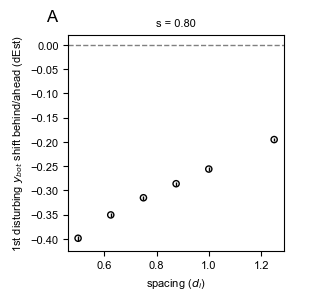

In [247]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.60,9.9e-27


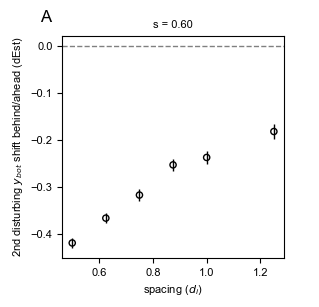

In [263]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## dy0lr

,variable,Spearman coeff,Spearman p
0,spacing,0.41,1.1e-12


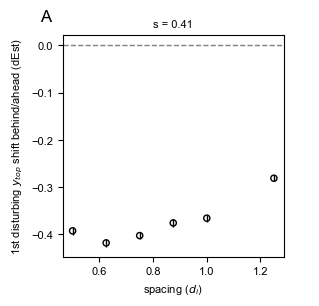

In [254]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dy0lr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$We_{sup}$,0.54,1.0e-04
1,$We_{ink}\times We_{sup}$,0.51,3.0e-04
2,$Re_{sup}$,0.50,3.7e-04
3,$Bm_{ink.asc}/Bm_{sup.asc}$,-0.52,1.9e-04
4,$\eta_{sup}$,-0.50,3.7e-04


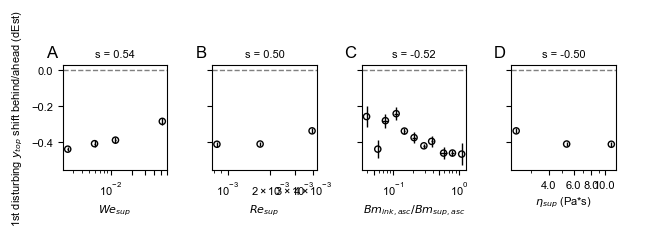

In [255]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dy0lr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.asc}}$,0.51,3.7e-04


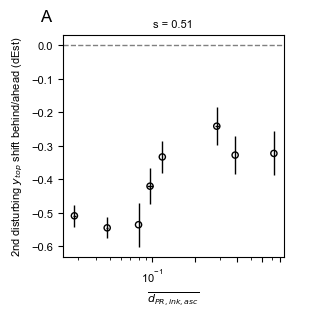

In [259]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dy0lr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
3,$tGd_{ink}/tGd_{sup}$,0.35,3.8e-09


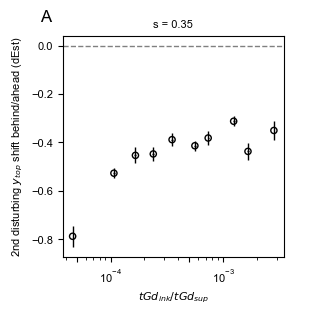

In [262]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dy0lr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)